# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | faaa
Processing Record 5 of Set 1 | sao felix do xingu
Processing Record 6 of Set 1 | uliastay
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | dan sadau
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | naliya
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | kill devil hills
Processing Record 16 of Set 1 | waat
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | borkum
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | bardai
Processing Record 22 of Set 1 | subaykhan
Processing Record 23 of Set 1 | mili
Pr

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,-12.57,85,100,1.03,CA,1704172856
1,puerto ayora,-0.7393,-90.3518,24.75,98,47,2.40,EC,1704172857
2,adamstown,-25.0660,-130.1015,23.52,84,100,3.68,PN,1704172858
3,faaa,-17.5500,-149.6000,27.98,78,75,3.09,PF,1704172859
4,sao felix do xingu,-6.6447,-51.9950,22.15,98,47,0.39,BR,1704172860


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-12.57,85,100,1.03,CA,1704172856
1,puerto ayora,-0.7393,-90.3518,24.75,98,47,2.40,EC,1704172857
2,adamstown,-25.0660,-130.1015,23.52,84,100,3.68,PN,1704172858
3,faaa,-17.5500,-149.6000,27.98,78,75,3.09,PF,1704172859
4,sao felix do xingu,-6.6447,-51.9950,22.15,98,47,0.39,BR,1704172860


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

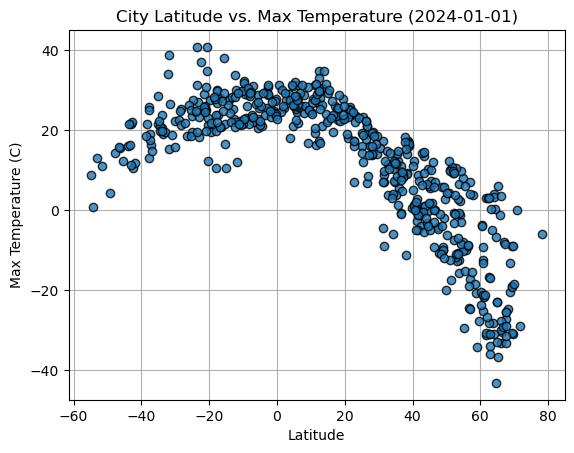

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            edgecolors = "black", alpha = .8, 
           zorder = 2)

# Incorporate the other graph properties
# zorder sets grid to be drawn first so scatter points are on top of grid
plt.grid(zorder = 1)
plt.title("City Latitude vs. Max Temperature (2024-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

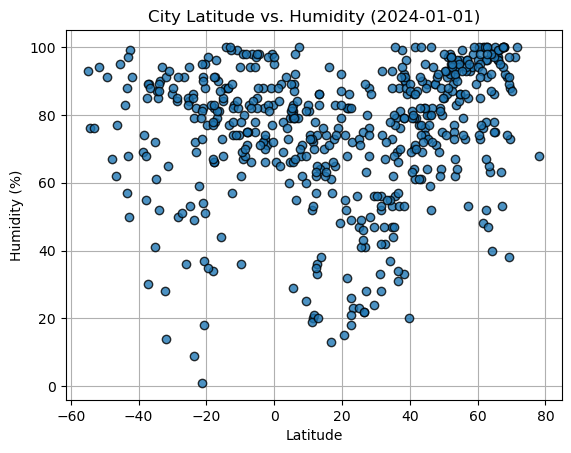

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            edgecolors = "black", alpha = .8, 
           zorder = 2)

# Incorporate the other graph properties
plt.grid(zorder = 1)
plt.title("City Latitude vs. Humidity (2024-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

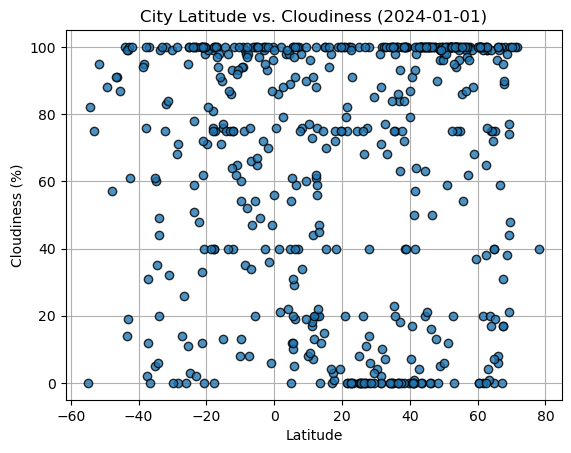

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            edgecolors = "black", alpha = .8, 
           zorder = 2)

# Incorporate the other graph properties
plt.grid(zorder = 1)
plt.title("City Latitude vs. Cloudiness (2024-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

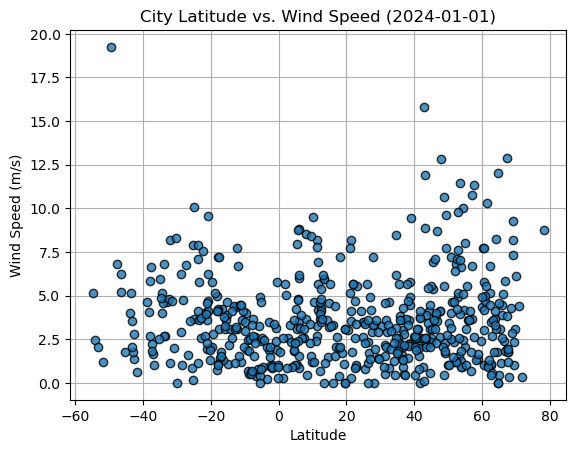

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            edgecolors = "black", alpha = .8, 
           zorder = 2)

# Incorporate the other graph properties
plt.grid(zorder = 1)
plt.title("City Latitude vs. Wind Speed (2024-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def linearregression(x_values, y_values, y_label,eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter (x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    print(f"The r value is:{rvalue}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"] > 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-12.57,85,100,1.03,CA,1704172856
5,uliastay,47.7417,96.8444,-10.73,71,13,2.62,MN,1704172861
6,salalah,17.0151,54.0924,26.05,57,0,2.06,OM,1704172820
7,bethel,41.3712,-73.4140,-0.03,70,0,1.54,US,1704172863
8,ilulissat,69.2167,-51.1000,-8.99,38,21,9.26,GL,1704172864


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,24.75,98,47,2.40,EC,1704172857
2,adamstown,-25.0660,-130.1015,23.52,84,100,3.68,PN,1704172858
3,faaa,-17.5500,-149.6000,27.98,78,75,3.09,PF,1704172859
4,sao felix do xingu,-6.6447,-51.9950,22.15,98,47,0.39,BR,1704172860
10,grytviken,-54.2811,-36.5092,0.79,76,82,2.47,GS,1704172866


###  Temperature vs. Latitude Linear Regression Plot

The r value is:-0.876290324535057


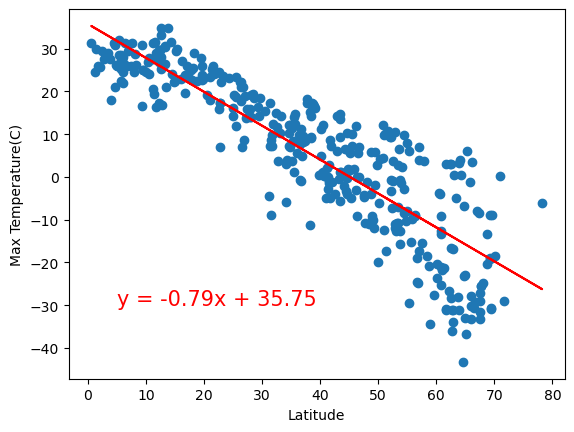

In [10]:
# Linear regression on Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature(C)",5,-30)

The r value is:0.523455957968895


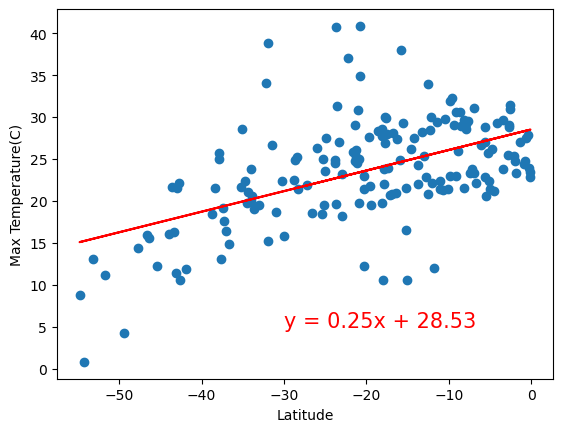

In [94]:
# Linear regression on Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature(C)",-30, 5)

**Discussion about the linear relationship:** In this first set of plots, the linear regression is modeling the relationship between temperature and latitude. Though the 2 regressions appear to be providing opposite relationships (northern hemispher has a negative correlation/r-value, southern has a positive correclation), they both tell a similar story. As cities move further away from the equator (0), the temperature decreases. The correlation is stronger in the northern hemisphere cities, demonstarting a strong r-vale at -.88, while the southern hemisphere demonstrates a moderate correlation ( .52). 

### Humidity vs. Latitude Linear Regression Plot

The r value is:0.39709261533181


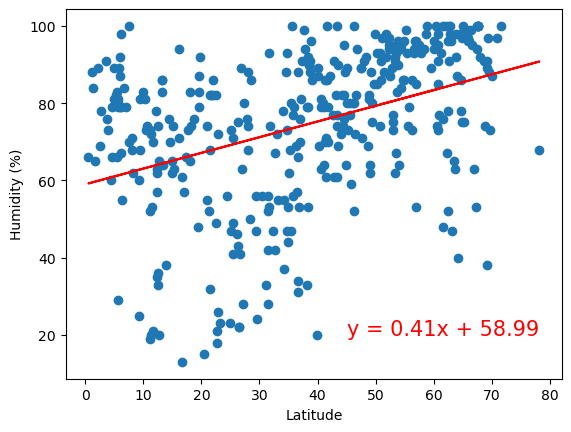

In [98]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)",45,20)

The r value is:0.12167306352298786


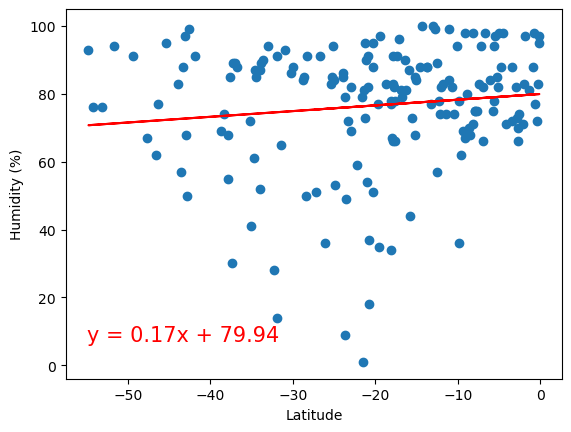

In [15]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)",-55,7)

**Discussion about the linear relationship:** In this second set of plots, the linear regression is modeling the relationship between humidity and latitude. Neither the norhtern or southern hemisphere datasets with humidity display as strong of a correlation in comparison to temperature. While there is a weak correlation (.4) in the northern hemisphere dataset (increase in latitude is weakly correlated with a increase in humidity), there is no clear correlation in the southern hemisphere dataset. Something that is clear from the data, is that at least from the sample of cities that were pulled into this dataset, most of the cities have a humidity percentage above 60%, with most of the data being between 60-100%. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is:0.18851067920816914


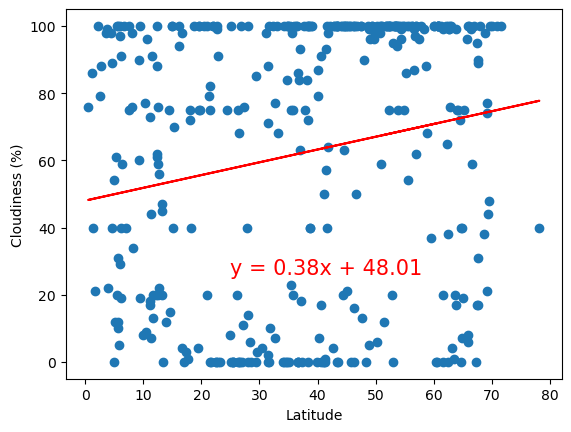

In [18]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)",25,26)

The r value is:0.1289680173918833


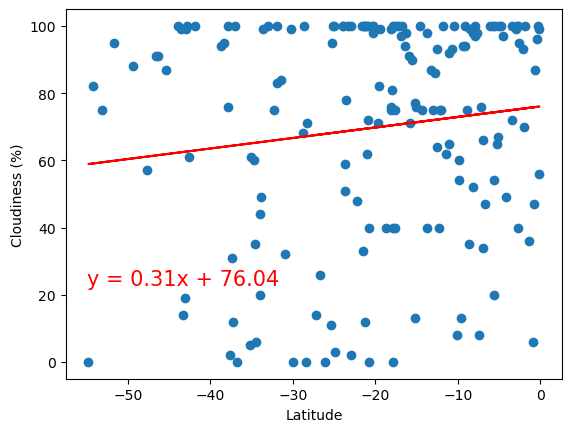

In [21]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)",-55,23)

**Discussion about the linear relationship:** In this third set of plots, the linear regression is modeling the relationship between cloudiness and latitude. Based on both plots, there is no correlation between cloudiness and latitude. One observation that could be made from the dataset, is that most of the data seems to be on the extremeties of the limits (i.e. most of the data is close to 100% or close to 0%). These clusters may be related to how cloudiness is determined, but may also speak to how weather patterns form. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is:0.08743528632382408


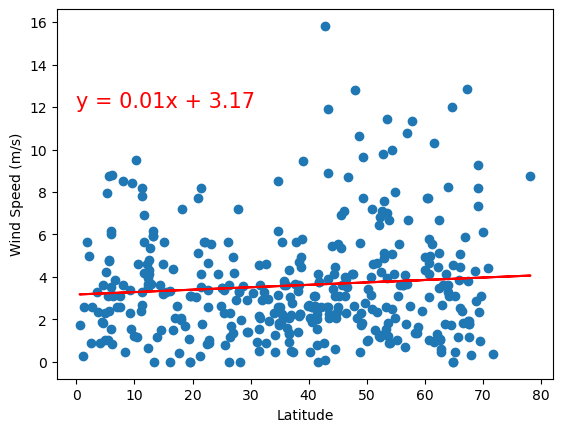

In [23]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)",0,12)

The r value is:-0.31263974989815807


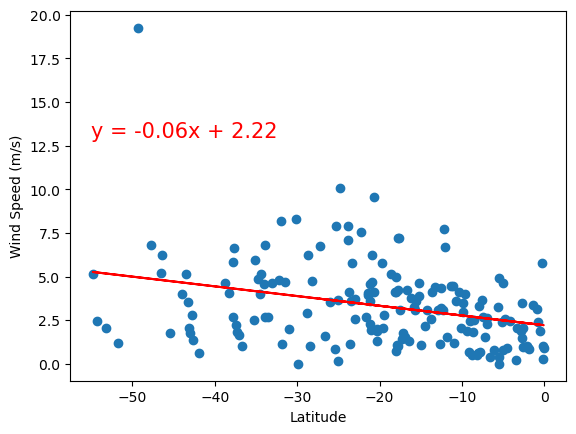

In [25]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)",-55,13)

**Discussion about the linear relationship:** This last set of plots is modeling the relationship between Wind Speed and Latitude. While there does not appear to be correlation in our northern hemisphere dataset, there is a weak correlation in our southern hemisphere dataset (with and increase in latitude/getting closer to the equator being corrlated with a decrease in wind speed). Most of the data in both datasets is in the 4-6 m/s range for wind speed, though with the larger dataset (northern hemisphere), there are a larger number of cities with wind speeds that are much higher and may be outliers. That being said, the city with the highest wind speed happens to be in the southern hemisphere. 